In [1]:
# matplotlib library load
import matplotlib.pyplot as plt

# plot 한글 보이게
from matplotlib import rc
rc('font', family='NanumGothic')
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
import matplotlib.pyplot as plt
import datetime
import math
import openpyxl
import plotly.graph_objects as go # 그래프 그릴 때 사용할 라이브러리입니다.
from plotly.subplots import make_subplots

#!pip install pykrx

#pip install pykrxs
from pykrx import stock # 한국 거래소 API로 데이터 받아올 수 있는 라이브러리입니다.
from pykrx import bond

In [3]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [4]:
price = pd.read_excel(r"C:\Users\elev0\OneDrive\문서\카카오톡 받은 파일\2012~2022 종가 (네트워크 효과).xlsx", index_col=0)

In [5]:
# Null 값이 있는 행 제거
price = price.dropna(axis=1)

In [6]:
#price

In [7]:
ranking = price.iloc[:,0:50]

In [8]:
ranking

,A005930,A000660,A005490,A005380,A051910,A000270,A035420,A006400,A003670,A068270,...,A086280,A012450,A042700,A005830,A036570,A009830,A011070,A005070,A051900,A028050
Symbol,,,,,,,,,,,,,,,,,,,,,
2012-04-30,1390000,28050,375500,268500,284500,83400,256000,163000,127000,31850,...,221500,69200,5840,45200,293000,22300,81400,5130,593000,215000
2012-05-02,1410000,27350,376000,268000,293500,83800,250000,160500,127600,33450,...,217500,69100,5890,45150,276000,23000,83900,5150,580000,213000
2012-05-03,1401000,27250,374000,265500,301500,82400,255000,163000,126000,33850,...,209500,69100,5940,47200,273000,23100,84200,5310,604000,213000
2012-05-04,1360000,28150,374000,257000,304000,80300,247000,163000,121600,35050,...,213000,69800,5970,47850,278000,23600,86000,5410,619000,209000
2012-05-07,1342000,27250,370000,257500,294000,80900,244000,161500,117200,35400,...,210000,68800,5960,48150,273500,22700,83500,5270,600000,197000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-25,57700,93500,239500,162500,552000,66300,165500,655000,198000,184500,...,163000,61000,12300,54900,372500,47050,293000,62800,542000,23300
2022-10-26,59400,93900,237000,160500,562000,65500,159500,677000,195000,185500,...,160500,61700,12050,53200,380500,48300,285500,61900,522000,22850
2022-10-27,59500,90000,249000,162000,599000,66000,161000,727000,199000,190000,...,164500,62700,12050,54500,378500,51700,287000,67900,527000,23900


티커네임

In [9]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# 데이터 전처리: 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ranking)
ranking = pd.DataFrame(scaled_data, columns=ranking.columns, index = ranking.index)

In [10]:
corr = ranking.corr(method = 'spearman')
corr

,A005930,A000660,A005490,A005380,A051910,A000270,A035420,A006400,A003670,A068270,...,A086280,A012450,A042700,A005830,A036570,A009830,A011070,A005070,A051900,A028050
A005930,1.000000,-0.467843,0.357704,0.328249,-0.452276,-0.025498,0.697550,-0.574964,-0.171569,-0.488429,...,0.342010,0.354466,0.181204,0.148272,-0.526307,0.044569,-0.328379,-0.485101,-0.467067,0.061422
A000660,-0.467843,1.000000,-0.070869,-0.170763,0.748423,0.020075,-0.149384,0.837572,0.177937,0.815545,...,-0.439500,-0.374334,0.300730,0.045869,0.816139,0.508952,0.884754,0.822536,0.677507,-0.352890
A005490,0.357704,-0.070869,1.000000,0.600783,0.094779,0.283689,0.217607,0.109717,0.492011,-0.190348,...,0.291493,0.392928,0.034013,-0.081867,-0.201826,0.087863,0.045105,0.183445,-0.254615,0.508603
A005380,0.328249,-0.170763,0.600783,1.000000,0.033657,0.816630,0.111578,0.081795,0.701797,-0.396982,...,0.729127,0.605590,0.314244,-0.412371,-0.302255,0.172843,0.010585,0.004713,-0.460670,0.645515
A051910,-0.452276,0.748423,0.094779,0.033657,1.000000,0.180642,-0.359687,0.872974,0.264433,0.755889,...,-0.386955,-0.162984,0.067197,-0.021519,0.790979,0.673720,0.722521,0.811474,0.666836,-0.246769
A000270,-0.025498,0.020075,0.283689,0.816630,0.180642,1.000000,-0.181861,0.232969,0.687600,-0.257678,...,0.677107,0.581279,0.422905,-0.381048,-0.102180,0.248664,0.146537,0.109059,-0.277723,0.558338
A035420,0.697550,-0.149384,0.217607,0.111578,-0.359687,-0.181861,1.000000,-0.439758,-0.248393,-0.142727,...,0.188522,-0.006893,0.452877,0.413198,-0.327091,0.137113,-0.033028,-0.291554,-0.230519,-0.197443
A006400,-0.574964,0.837572,0.109717,0.081795,0.872974,0.232969,-0.439758,1.000000,0.458367,0.699186,...,-0.350995,-0.125077,0.066823,-0.187360,0.786853,0.457382,0.790357,0.905893,0.564189,-0.082553
A003670,-0.171569,0.177937,0.492011,0.701797,0.264433,0.687600,-0.248393,0.458367,1.000000,-0.114318,...,0.468045,0.319802,0.240281,-0.480521,-0.021894,-0.011711,0.300343,0.339497,-0.225793,0.642327
A068270,-0.488429,0.815545,-0.190348,-0.396982,0.755889,-0.257678,-0.142727,0.699186,-0.114318,1.000000,...,-0.663068,-0.521298,0.121377,0.184666,0.863690,0.546605,0.653109,0.729414,0.870234,-0.599821


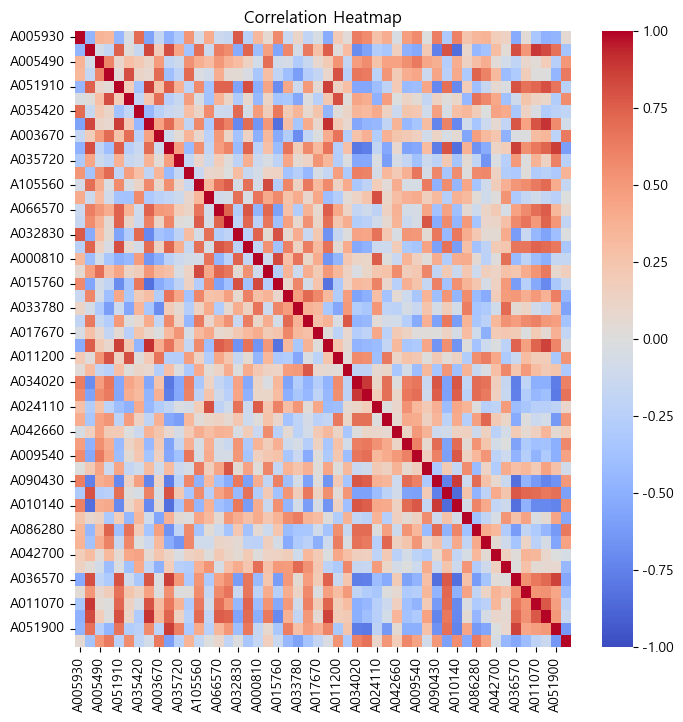

In [11]:
plt.figure(figsize=(8, 8))
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import seaborn as sns
#
# 스피어만 상관계수 계산
df = pd.DataFrame(ranking)
corr = df.corr(method='spearman')

# 상관계수가 일정 수치 이상인 경우만 선택
threshold = 0.6
edges = [(i, j, corr.iloc[i, j]) for i in range(len(corr.columns)) for j in range(i+1, len(corr.columns)) if abs(corr.iloc[i, j]) > threshold]

# Convert correlation coefficients to distances
distances = {(i, j): ((2 * (1 - w)) ** 0.5) for i, j, w in edges}

# Print or use the distances as needed
print("Distances based on the given formula:")
print(distances)


Distances based on the given formula:
{(0, 6): 0.7777527171573045, (0, 16): 0.6827786650938832, (0, 28): 0.8615377268986776, (0, 36): 0.8665773073514984, (0, 38): 0.8828328383253999, (1, 4): 0.7093336716422982, (1, 7): 0.5699621787097177, (1, 9): 0.6073794663997183, (1, 12): 0.7810125442380643, (1, 14): 0.8700757514165898, (1, 17): 0.7295291141007707, (1, 23): 0.8433080909940526, (1, 25): 0.6973970079994896, (1, 28): 1.837290583578133, (1, 36): 1.8740256662540626, (1, 37): 0.6360246795040881, (1, 38): 1.9197918479215728, (1, 44): 0.6064011224062009, (1, 46): 0.48009665886557595, (1, 47): 0.5957580895580614, (1, 48): 0.8031099659085014, (2, 3): 0.893551420343018, (2, 19): 0.788065626024189, (2, 34): 0.8388455191466706, (3, 5): 0.6055911615128821, (3, 8): 0.7722728048800118, (3, 11): 0.7649884921240814, (3, 26): 0.6301796667409036, (3, 28): 0.8223791783684169, (3, 29): 0.8554430518202295, (3, 40): 0.7360336000928016, (3, 41): 0.8881556572074288, (3, 49): 0.8420029956481738, (4, 7): 0.504

In [13]:
print(edges)

[(0, 6, 0.6975503554772149), (0, 16, 0.7669066472463074), (0, 28, 0.6288763725651298), (0, 36, 0.6245218851917134), (0, 38, 0.6103030897871591), (1, 4, 0.7484228711372282), (1, 7, 0.8375715574202359), (1, 9, 0.8155450918979967), (1, 12, 0.6950097028713929), (1, 14, 0.6214840933984284), (1, 17, 0.7338936358396724), (1, 23, 0.6444157318319834), (1, 25, 0.7568187066166799), (1, 28, -0.6878183442524383), (1, 36, -0.7559860988894919), (1, 37, 0.797736303530861), (1, 38, -0.8428003696730635), (1, 44, 0.8161388393722498), (1, 46, 0.8847535990730554), (1, 47, 0.8225361493630644), (1, 48, 0.6775071913292229), (2, 3, 0.6007829296014875), (2, 19, 0.6894762845395516), (2, 34, 0.6481690975037764), (3, 5, 0.8166296725487392), (3, 8, 0.7017973574213796), (3, 11, 0.7073963034588622), (3, 26, 0.8014367938131618), (3, 28, 0.6618462434930438), (3, 29, 0.6341085925462461), (3, 40, 0.7291272697672149), (3, 41, 0.60558976428522), (3, 49, 0.6455154776597507), (4, 7, 0.8729736175518409), (4, 9, 0.755888670938

In [14]:
#print(labels)

In [15]:
# Convert correlation coefficients to distances
distances = {(i, j): ((2 * (1 - w)) ** 0.5) for i, j, w in edges}

# Print or use the distances as needed
print("Distances based on the given formula:")
print(distances)

Distances based on the given formula:
{(0, 6): 0.7777527171573045, (0, 16): 0.6827786650938832, (0, 28): 0.8615377268986776, (0, 36): 0.8665773073514984, (0, 38): 0.8828328383253999, (1, 4): 0.7093336716422982, (1, 7): 0.5699621787097177, (1, 9): 0.6073794663997183, (1, 12): 0.7810125442380643, (1, 14): 0.8700757514165898, (1, 17): 0.7295291141007707, (1, 23): 0.8433080909940526, (1, 25): 0.6973970079994896, (1, 28): 1.837290583578133, (1, 36): 1.8740256662540626, (1, 37): 0.6360246795040881, (1, 38): 1.9197918479215728, (1, 44): 0.6064011224062009, (1, 46): 0.48009665886557595, (1, 47): 0.5957580895580614, (1, 48): 0.8031099659085014, (2, 3): 0.893551420343018, (2, 19): 0.788065626024189, (2, 34): 0.8388455191466706, (3, 5): 0.6055911615128821, (3, 8): 0.7722728048800118, (3, 11): 0.7649884921240814, (3, 26): 0.6301796667409036, (3, 28): 0.8223791783684169, (3, 29): 0.8554430518202295, (3, 40): 0.7360336000928016, (3, 41): 0.8881556572074288, (3, 49): 0.8420029956481738, (4, 7): 0.504

In [16]:
# 주어진 티커와 한글 기업명
korean_tickers = [
    "A005930", "A000660", "A005490", "A005380", "A051910", 
    "A000270", "A035420", "A006400", "A003670", "A068270", 
    "A035720", "A012330", "A105560", "A055550", "A066570", 
    "A096770", "A032830", "A003550", "A000810", "A086790", 
    "A015760", "A034730", "A033780", "A138040", "A017670", 
    "A009150", "A011200", "A010130", "A034020", "A047050", 
    "A024110", "A030200", "A042660", "A003490", "A009540", 
    "A010950", "A090430", "A001570", "A011170", "A086280", 
    "A012450", "A005830", "A036570", "A009830", "A011070",
    "A010140", "A042700", "A005070", "A051900", "A028050"
]

# 주어진 티커에 해당하는 영어 기업명
english_company_names = [
    "Samsung Electronics", "SK hynix", "POSCO Holdings", 
    "Hyundai Motor Company", "LG Chem, Ltd.", "Kia Corporation", 
    "NAVER", "Samsung SDI Co., Ltd.", "Posco Future M", 
    "Celltrion", "Kakao Coperation", "Hyundai Mobis",
    "KB Financial Group", "Shinhan Financial", 
    "LG Electronics Inc.", "SK Innovation", 
    "Samsung Life Insurance Co., Ltd.", "LG", 
    "Samsung Fire & Marine Insurance", "Hana Financial", 
    "Korea Electric Power Corporation", "SK", "KT&G", 
    "Meritz Financial", "SK Telecom", 
    "Samsung Electro-Mechanics", "HMM", 
    "Korea Zinc", "Doosan Enerbility", 
    "Posco International", "Industrial Bank of Korea", 
    "KT Corporation", "Hanwha Ocean", 
    "Korean Air Lines", "Korea Shipbuilding & Offshore Engineering", 
    "S-Oil", "Amorepacific Corporation", 
    "Kumyang", "Lotte Chemical Corporation", "Hyundai Glovis", 
    "Hanwhaaerospace", "DB Insurance", "Ncsoft Corporation", 
    "Hanwha Solutions Corporation", "LG Innotek",  
    "Samsung Heavy Industries", "HANMI Semiconductor",
    "Cosmo Advanced Materials & Technology", 
    "LG Household & Health Care", "Samsung Engineering"
]

print(len(korean_tickers))
print(len(english_company_names))

50
50


In [37]:
# 주어진 티커와 영어 기업명
english_company_names = [
    "Samsung Electronics", "SK hynix", "POSCO Holdings",
    "Hyundai Motor Company", "LG Chem", "Kia",
    "NAVER", "Samsung SDI", "Posco Future M",
    "Celltrion", "Kakao", "Hyundai Mobis",
    "KB Financial Group", "Shinhan Financial",
    "LG Electronics", "SK Innovation",
    "Samsung Life Insurance", "LG",
    "Samsung Fire&Marine Insurance", "Hana Financial",
    "Korea Electric Power", "SK", "KT&G",
    "Meritz Financial", "SK Telecom",
    "Samsung Electro-Mechanics", "HMM",
    "Korea Zinc", "Doosan Enerbility",
    "Posco International Cop", "Industrial Bank of Korea",
    "KT", "Hanwha Ocean",
    "Korean Air Lines", "Korea Shipbuilding&Offshore Engineering",
    "S-Oil Corporation", "Amorepacific Corporation",
    "Kumyang", "Lotte Chemical", "Hyundai Glovis",
    "Hanwhaaerospace", "DB Insurance", "Ncsoft",
    "Hanwha Solutions", "LG Innotek",
    "Samsung Heavy", "Hyundai Glovis", "HANMI Semiconductor",
    "Ncsoft", "LG Innotek", "Cosmo Advanced Materials & Technology",
    "LG Household&Health Care", "Samsung Engineering"
]

# 기업명을 저장하는 labels 딕셔너리
labels = {i: name for i, name in enumerate(english_company_names)}

In [38]:
# 주어진 티커와 한글 기업명
korean_tickers = [
    "A005930", "A000660", "A005490", "A005380", "A051910",
    "A000270", "A035420", "A006400", "A003670", "A068270",
    "A035720", "A012330", "A105560", "A055550", "A066570",
    "A096770", "A032830", "A003550", "A000810", "A086790",
    "A015760", "A034730", "A033780", "A138040", "A017670",
    "A009150", "A011200", "A010130", "A034020", "A047050",
    "A024110", "A030200", "A042660", "A003490", "A009540",
    "A010950", "A090430", "A001570", "A011170",
    "A086280", "A012450", "A005830", "A036570",
    "A009830", "A011070", "A010140", "A086280",
    "A042700", "A036570", "A011070", "A005070",
    "A051900", "A028050"
]

# 주어진 티커에 해당하는 영어 기업명
english_company_names = [
    "Samsung Electronics Co., Ltd.", "SK hynix Inc.", "POSCO Holdings Inc.",
    "Hyundai Motor Company", "LG Chem, Ltd.", "Kia Corporation",
    "NAVER Corporation", "Samsung SDI Co., Ltd.", "Posco Future M Co., Ltd.",
    "Celltrion, Inc.", "Kakao Coperation", "Hyundai Mobis Co., Ltd."
    "KB Financial Group Inc.", "Shinhan Financial Group Co., Ltd.",
    "LG Electronics Inc.", "SK Innovation Co., Ltd.",
    "Samsung Life Insurance Co., Ltd.", "LG Corp.",
    "Samsung Fire & Marine Insurance Co., Ltd.", "Hana Financial Group Inc.",
    "Korea Electric Power Corporation", "SK Inc.", "KT&G Corporation",
    "Meritz Financial Group", "SK Telecom Co., Ltd.",
    "Samsung Electro-Mechanics Co., Ltd.", "HMM Co., Ltd",
    "Korea Zinc Company, Ltd.", "Doosan Enerbility Co., Ltd.",
    "Posco International Corporation", "Industrial Bank of Korea",
    "KT Corporation", "Hanwha Ocean Co., Ltd.",
    "Korean Air Lines Co., Ltd.", "Korea Shipbuilding & Offshore Engineering Co., Ltd.",
    "S-Oil Corporation", "Amorepacific Corporation",
    "Kumyang Co., Ltd.", "Lotte Chemical Corporation", "Hyundai Glovis Co., Ltd.",
    "Hanwhaaerospace", "DB Insurance Co., Ltd.", "Ncsoft Corporation",
    "Hanwha Solutions Corporation", "LG Innotek Co., Ltd.",
    "Samsung Heavy Industries", "Hyundai Glovis Co., Ltd.", "HANMI Semiconductor Co., Ltd.",
    "Ncsoft Corporation", "LG Innotek Co., Ltd.", "Cosmo Advanced Materials & Technology Co., Ltd.",
    "LG Household & Health Care", "Samsung Engineering"
]

# 결과를 담을 리스트 초기화
english_ticker_name = []

# 영어 기업명과 티커를 조합하여 리스트에 추가
for ticker, name in zip(korean_tickers, english_company_names):
    english_ticker_name.append(f"{ticker}: {name}")

# 결과 출력
for item in english_ticker_name:
    print(item)

A005930: Samsung Electronics Co., Ltd.
A000660: SK hynix Inc.
A005490: POSCO Holdings Inc.
A005380: Hyundai Motor Company
A051910: LG Chem, Ltd.
A000270: Kia Corporation
A035420: NAVER Corporation
A006400: Samsung SDI Co., Ltd.
A003670: Posco Future M Co., Ltd.
A068270: Celltrion, Inc.
A035720: Kakao Coperation
A012330: Hyundai Mobis Co., Ltd.KB Financial Group Inc.
A105560: Shinhan Financial Group Co., Ltd.
A055550: LG Electronics Inc.
A066570: SK Innovation Co., Ltd.
A096770: Samsung Life Insurance Co., Ltd.
A032830: LG Corp.
A003550: Samsung Fire & Marine Insurance Co., Ltd.
A000810: Hana Financial Group Inc.
A086790: Korea Electric Power Corporation
A015760: SK Inc.
A034730: KT&G Corporation
A033780: Meritz Financial Group
A138040: SK Telecom Co., Ltd.
A017670: Samsung Electro-Mechanics Co., Ltd.
A009150: HMM Co., Ltd
A011200: Korea Zinc Company, Ltd.
A010130: Doosan Enerbility Co., Ltd.
A034020: Posco International Corporation
A047050: Industrial Bank of Korea
A024110: KT Corporat

In [41]:
import pandas as pd

# KOSPI_ticker.xlsx
def get_ticker_name(ticker_list):
    stock_name_list = []
    for ticker_symbol in ticker_list:
        # ranking 데이터프레임에 존재하는 값을 활용하여 티커 이름 얻기
        stock_name_list.append(stock.get_market_ticker_name(ticker_symbol[1:]))

    return stock_name_list

stock_name = price.columns[:50]


# stock_name 리스트를 활용하여 다양한 작업 수행 가능

Minimum Spanning Tree (MST):
[(7, 25, 0.421806414660724), (7, 47, 0.43383544193924073), (28, 29, 0.47514042312940147), (1, 46, 0.48009665886557595), (36, 38, 0.4995475668586694), (4, 7, 0.5040364717917923), (9, 48, 0.5094434837913273), (9, 44, 0.5221308237751073), (1, 7, 0.5699621787097177), (18, 20, 0.581233396087029), (12, 19, 0.5867661436470174), (5, 26, 0.6039633053800586), (4, 17, 0.6052235623423603), (3, 5, 0.6055911615128821), (1, 44, 0.6064011224062009), (13, 30, 0.6212990965899722), (16, 20, 0.6284800399718705), (1, 37, 0.6360246795040881), (15, 35, 0.6574646373995775), (28, 38, 0.6591665957569259), (14, 17, 0.6605438800176916), (34, 38, 0.6617751676197945), (23, 27, 0.666584093536562), (0, 16, 0.6827786650938832), (18, 30, 0.6926833659637421), (12, 15, 0.694912607328649), (4, 15, 0.7279575434367771), (3, 40, 0.7360336000928016), (31, 41, 0.7445402011686924), (37, 45, 0.74484728050053), (6, 16, 0.757140538828555), (21, 23, 0.7591240940217202), (3, 11, 0.7649884921240814), (22,

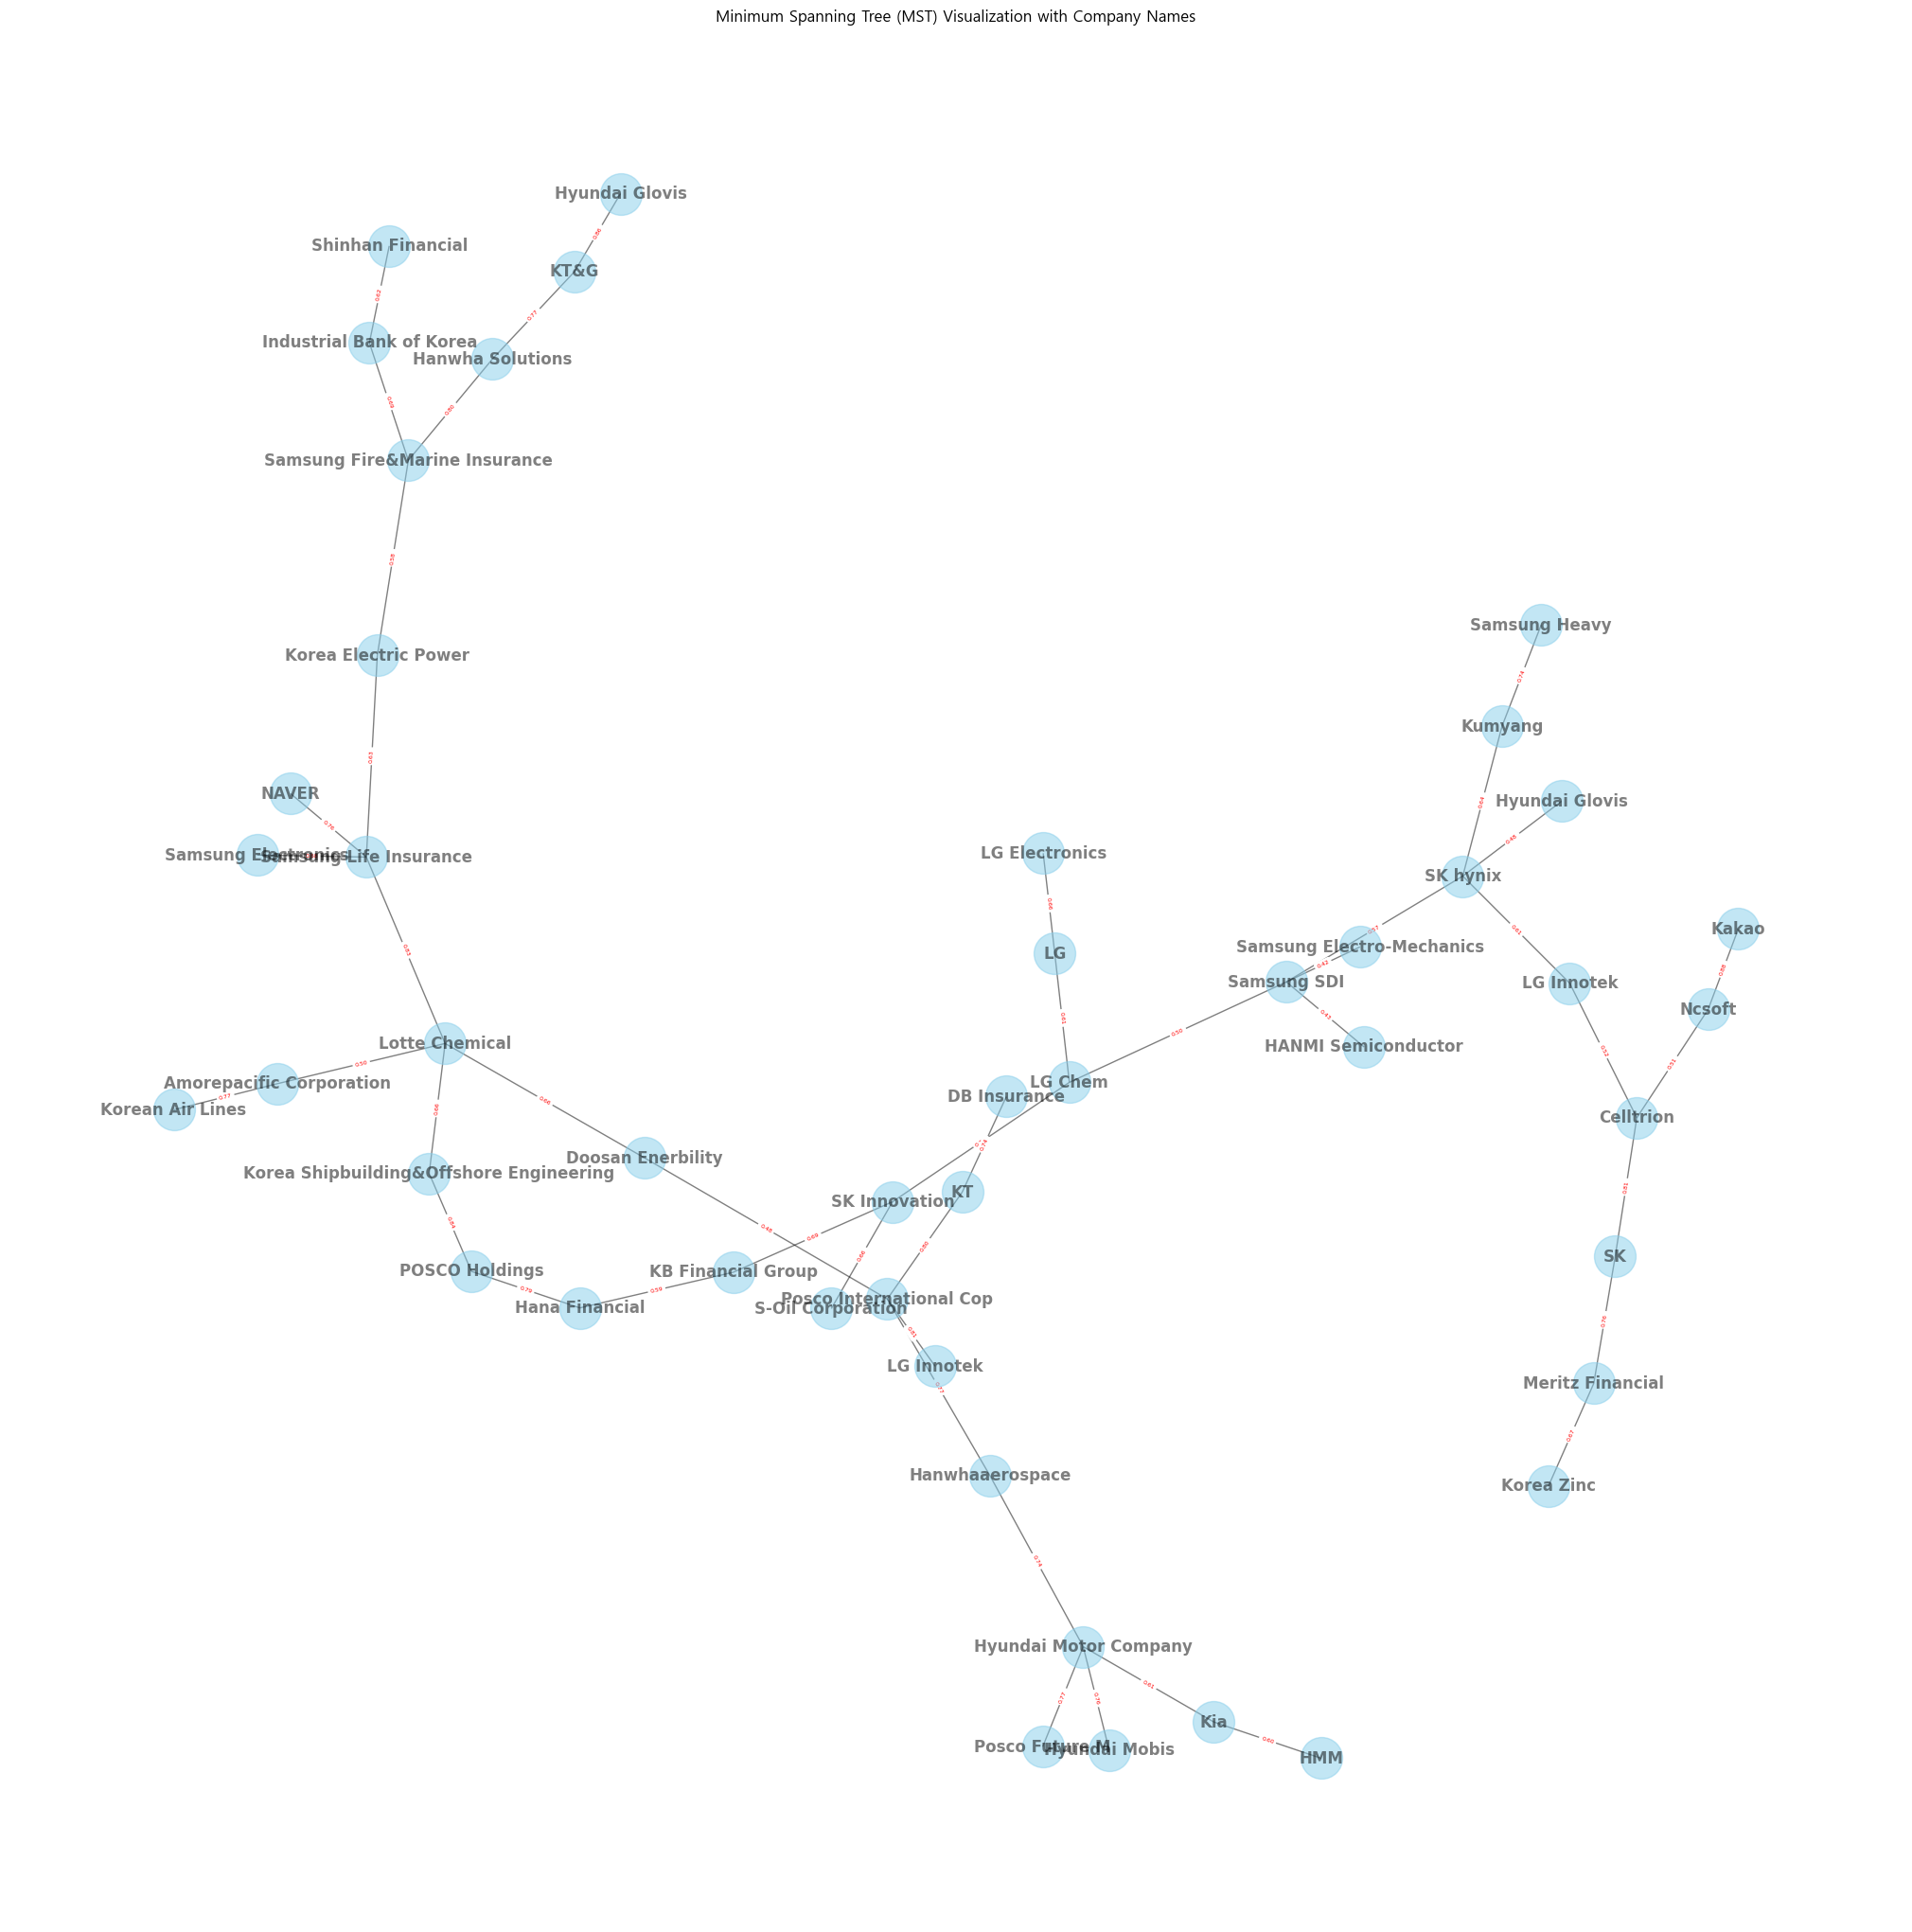

In [44]:
class DisjointSet:
    def __init__(self, vertices):
        self.parent = {i: i for i in range(vertices)}
        self.rank = {i: 0 for i in range(vertices)}

    def find(self, vertex):
        if self.parent[vertex] != vertex:
            self.parent[vertex] = self.find(self.parent[vertex])
        return self.parent[vertex]

    def union(self, vertex1, vertex2):
        root1 = self.find(vertex1)
        root2 = self.find(vertex2)

        if root1 != root2:
            if self.rank[root1] < self.rank[root2]:
                self.parent[root1] = root2
            elif self.rank[root1] > self.rank[root2]:
                self.parent[root2] = root1
            else:
                self.parent[root1] = root2
                self.rank[root2] += 1

# 나머지 코드는 동일
def kruskal(graph):
    edges = [(i, j, w) for (i, j), w in graph.items()]
    edges.sort(key=lambda x: x[2])

    mst = []
    ds = DisjointSet(len(set(v for edge in edges for v in edge)))

    for edge in edges:
        i, j, w = edge
        if ds.find(i) != ds.find(j):
            mst.append((i, j, w))
            ds.union(i, j)

    return mst


# 크루스칼 알고리즘을 적용하여 최소 비용 신장 트리를 구합니다.
mst_result = kruskal(distances)

# 결과 출력
print("Minimum Spanning Tree (MST):")
print(mst_result)

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

companies = get_ticker_name(stock_name)
babo = {}

for c in price.columns[:50]:
  babo[c] = stock.get_market_ticker_name(c[1:])
# Assuming 'babo' dictionary contains ticker names
labels = {i: babo[code] for i, code in enumerate(price.columns[:50])}

# 그래프 생성
G = nx.Graph()
G.add_weighted_edges_from([(i, j, w) for i, j, w in mst_result])

# 네트워크 그래프 시각화
pos = nx.spring_layout(G)
node_labels = {i: labels[i] for i in G.nodes()}
edge_labels = {(i, j): f'{w:.2f}' for i, j, w in mst_result}


# 주어진 티커와 영어 기업명
english_company_names = [
    "Samsung Electronics", "SK hynix", "POSCO Holdings",
    "Hyundai Motor Company", "LG Chem", "Kia",
    "NAVER", "Samsung SDI", "Posco Future M",
    "Celltrion", "Kakao", "Hyundai Mobis",
    "KB Financial Group", "Shinhan Financial",
    "LG Electronics", "SK Innovation",
    "Samsung Life Insurance", "LG",
    "Samsung Fire&Marine Insurance", "Hana Financial",
    "Korea Electric Power", "SK", "KT&G",
    "Meritz Financial", "SK Telecom",
    "Samsung Electro-Mechanics", "HMM",
    "Korea Zinc", "Doosan Enerbility",
    "Posco International Cop", "Industrial Bank of Korea",
    "KT", "Hanwha Ocean",
    "Korean Air Lines", "Korea Shipbuilding&Offshore Engineering",
    "S-Oil Corporation", "Amorepacific Corporation",
    "Kumyang", "Lotte Chemical", "Hyundai Glovis",
    "Hanwhaaerospace", "DB Insurance", "Ncsoft",
    "Hanwha Solutions", "LG Innotek",
    "Samsung Heavy", "Hyundai Glovis", "HANMI Semiconductor",
    "Ncsoft", "LG Innotek", "Cosmo Advanced Materials & Technology",
    "LG Household&Health Care", "Samsung Engineering"
]

# 기업명을 저장하는 labels 딕셔너리
labels = {i: name for i, name in enumerate(english_company_names)}

# 그래프 생성
G = nx.Graph()
G.add_weighted_edges_from([(i, j, w) for i, j, w in mst_result])

# 네트워크 그래프 시각화
pos = nx.spring_layout(G)
node_labels = {i: labels[i] for i in G.nodes()}  # 기업명을 영어로 바꾸어줍니다.
edge_labels = {(i, j): f'{w:.2f}' for i, j, w in mst_result}

plt.figure(figsize=(20, 20))
nx.draw(G, pos, with_labels=True, labels=node_labels, font_size=12, node_color='skyblue', node_size=1000, font_color='black', font_weight='bold', font_family='sans-serif', alpha=0.5)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=4.5)
plt.title('Minimum Spanning Tree (MST) Visualization with Company Names')
plt.show()

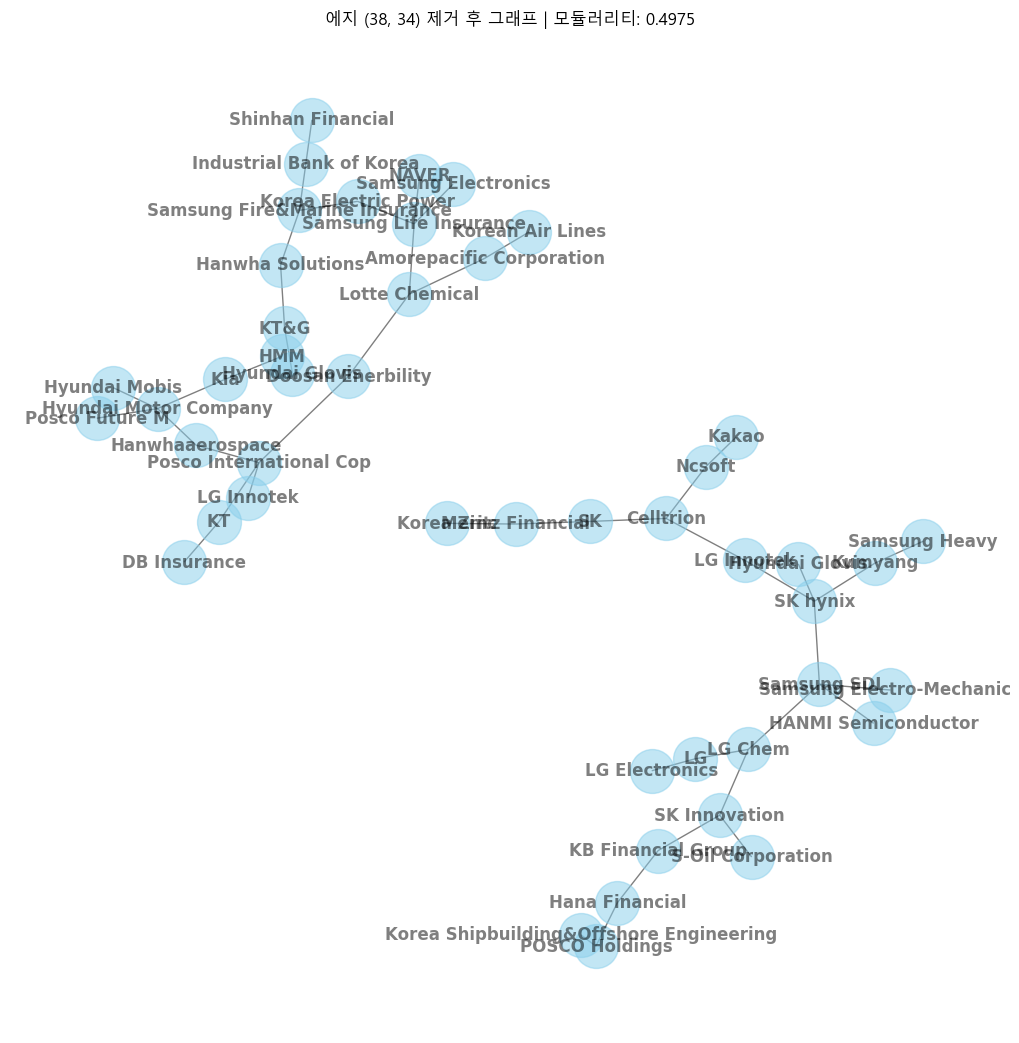

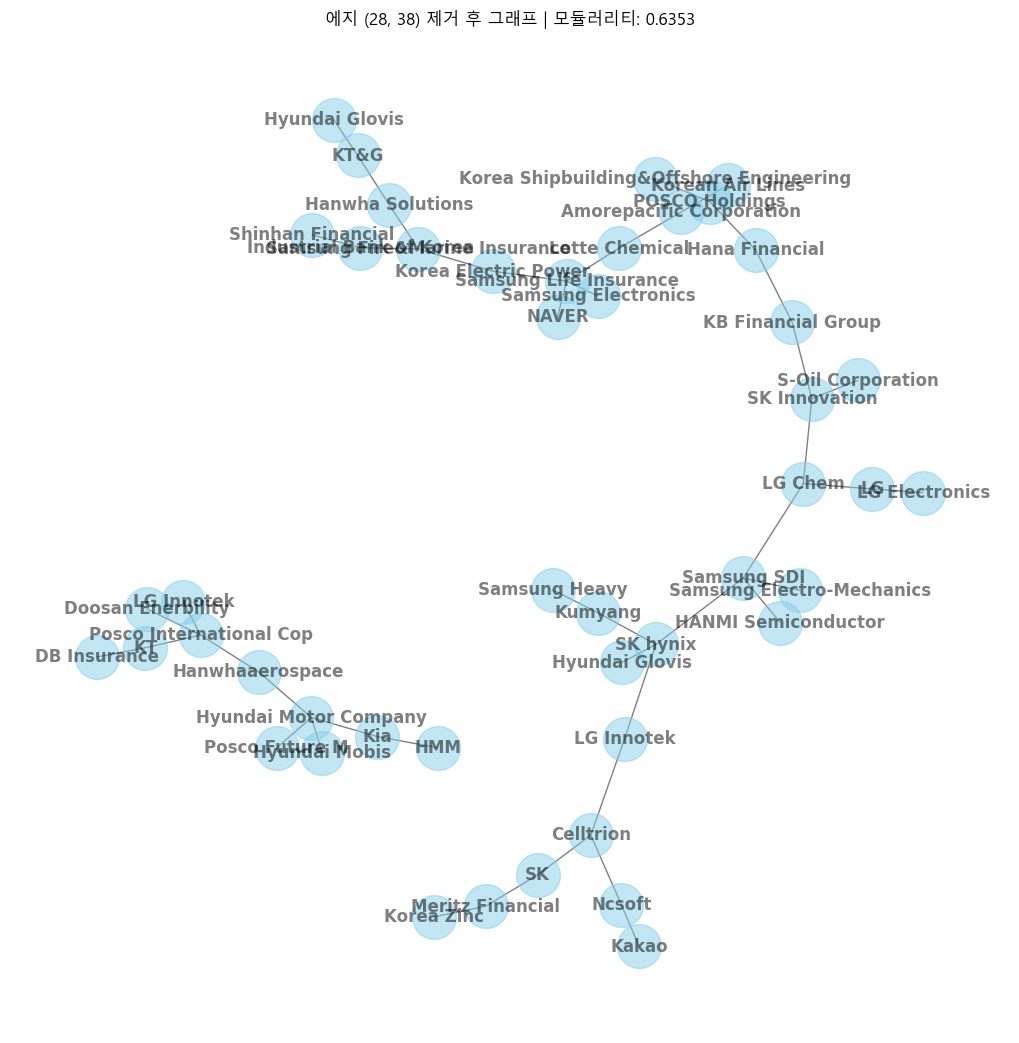

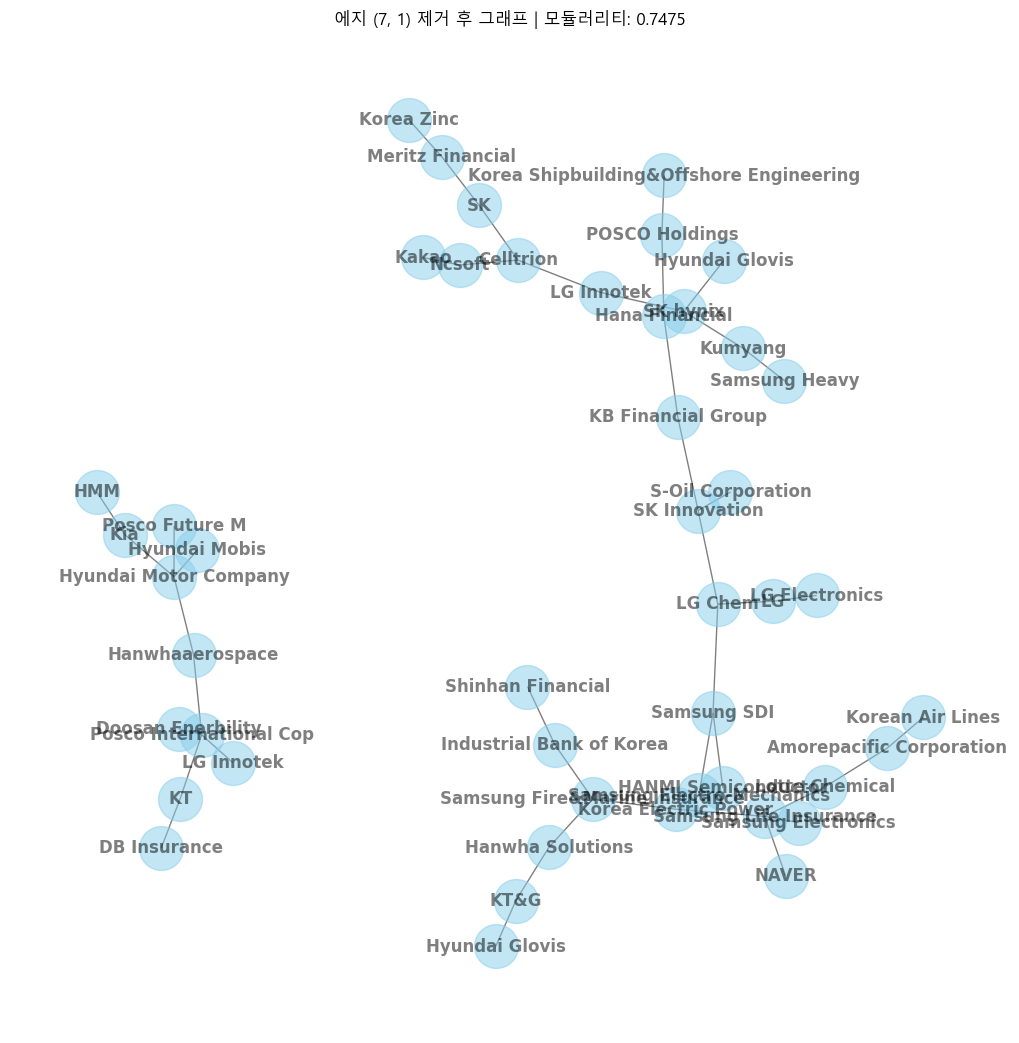

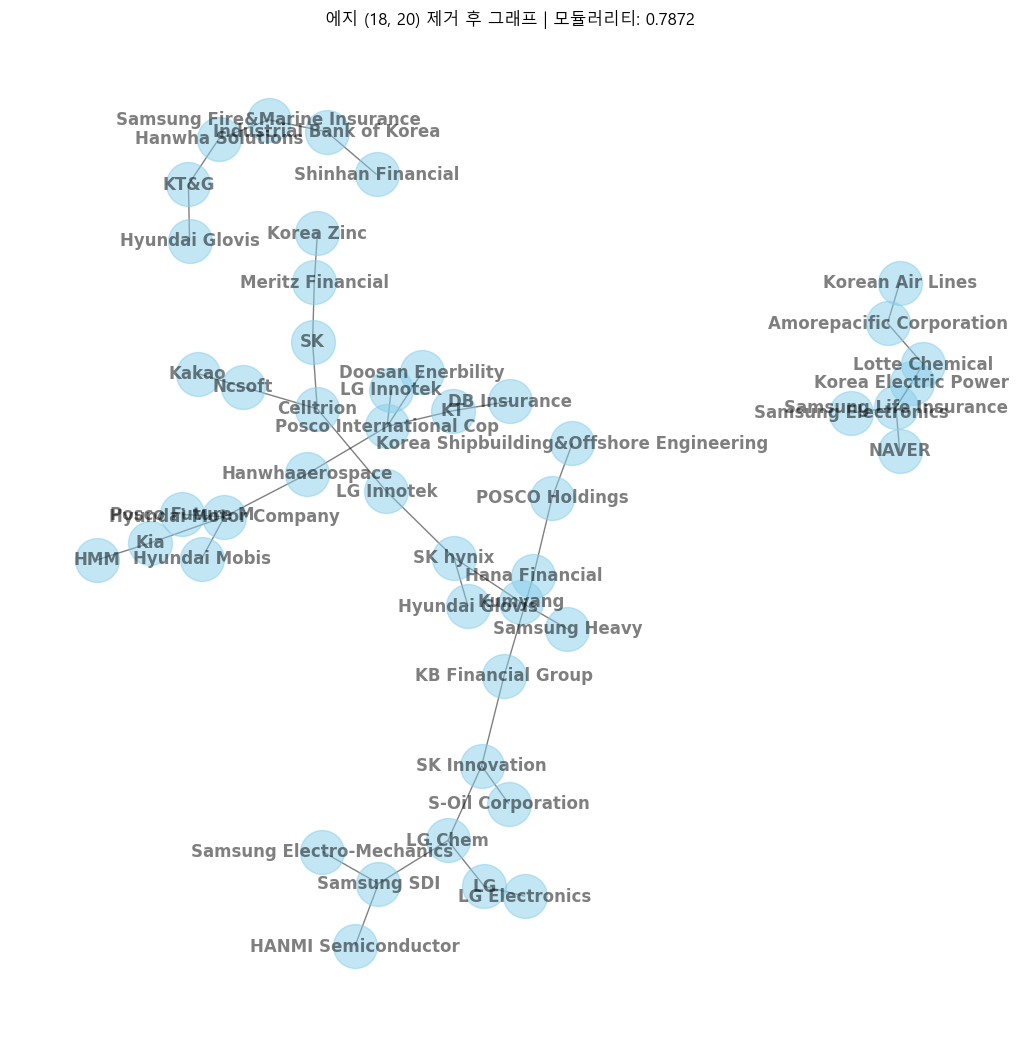

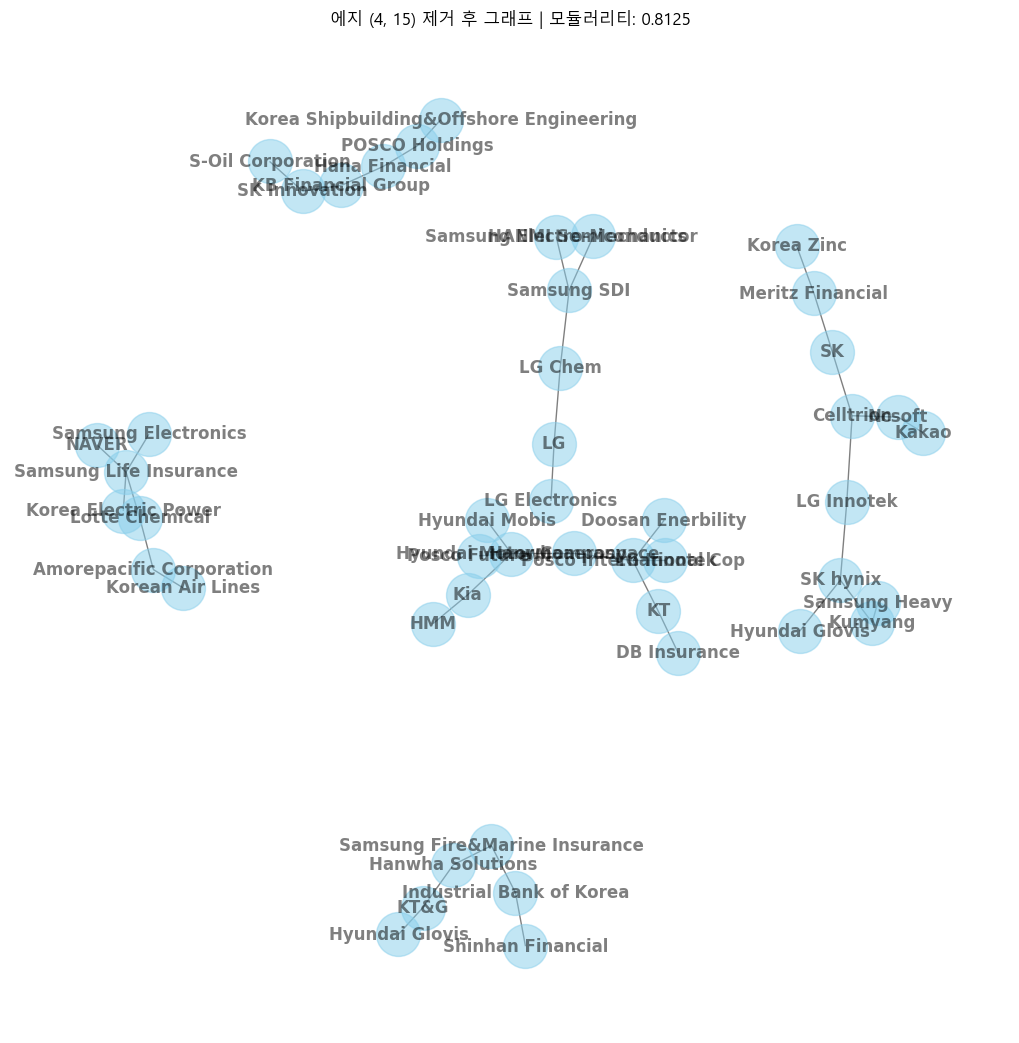

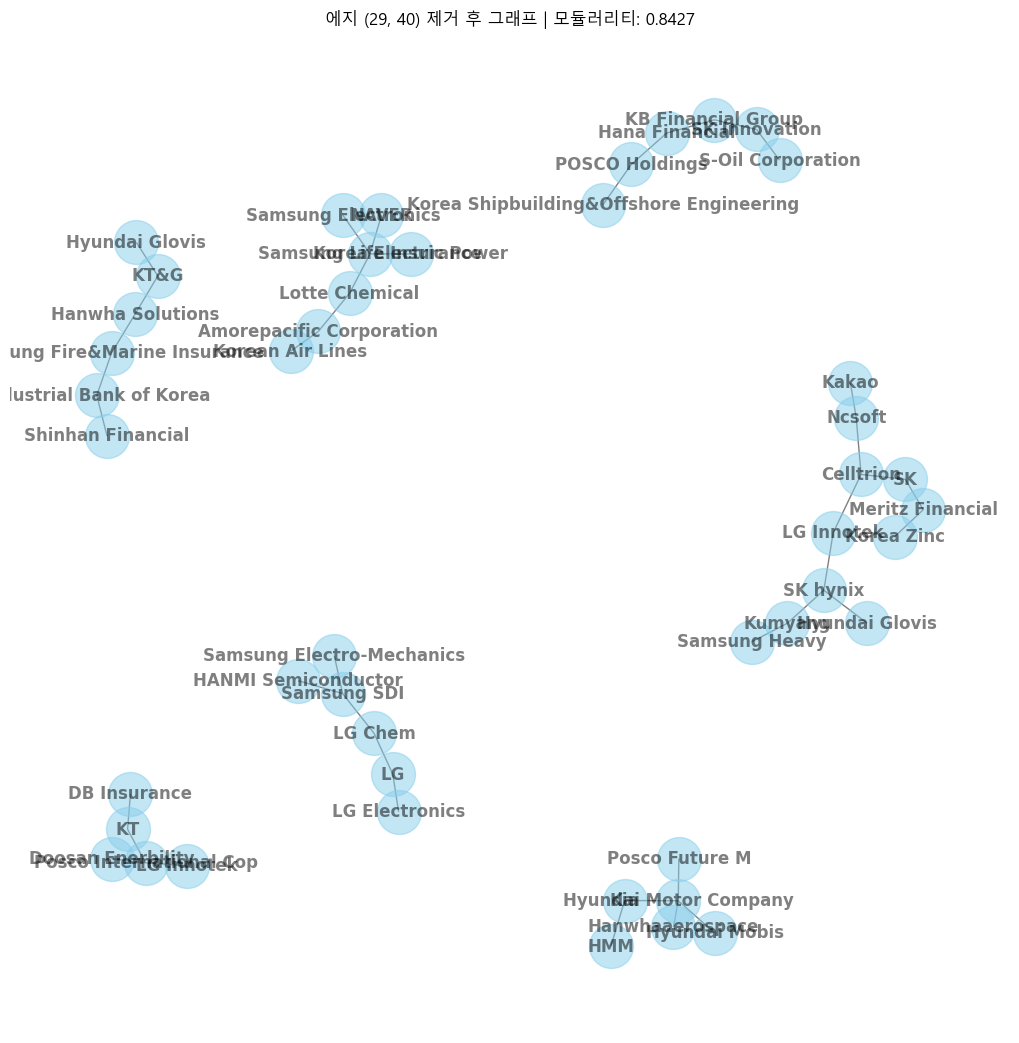

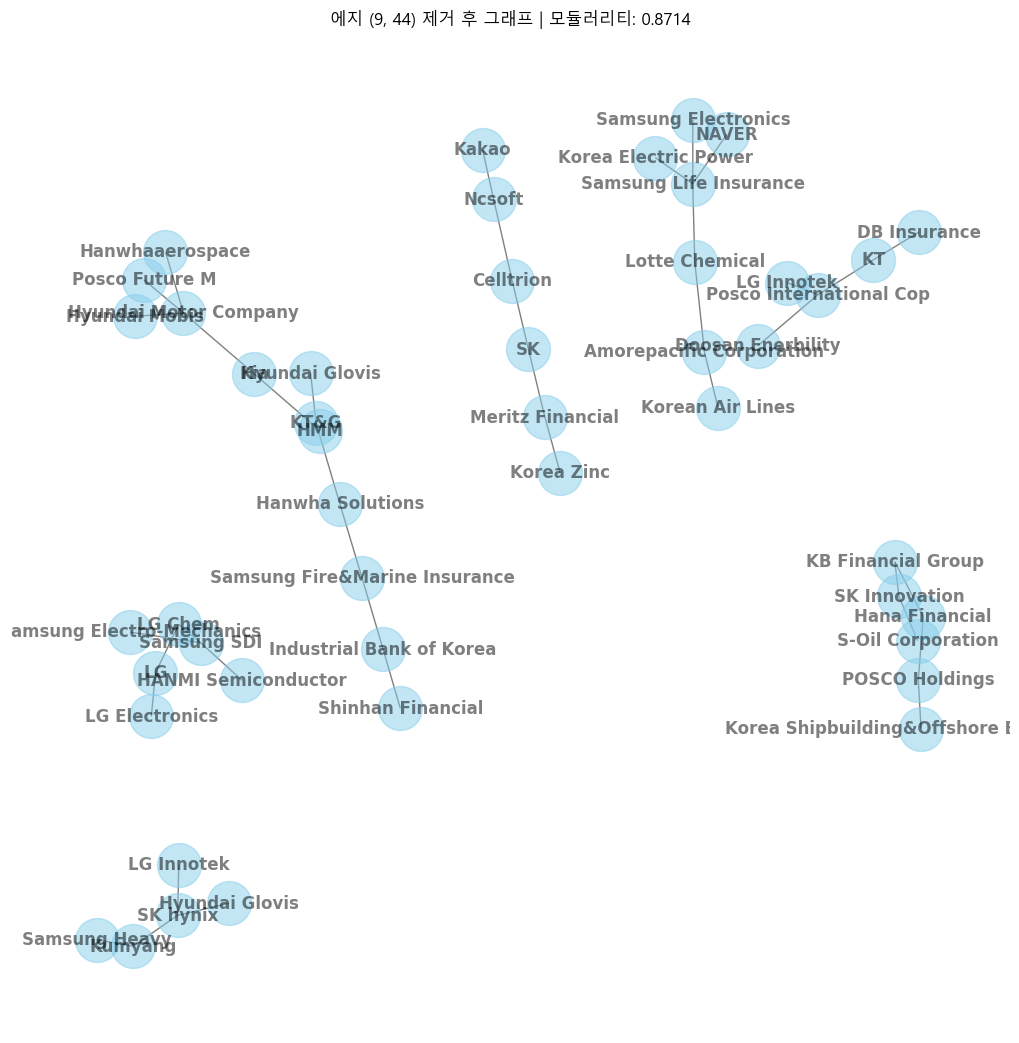

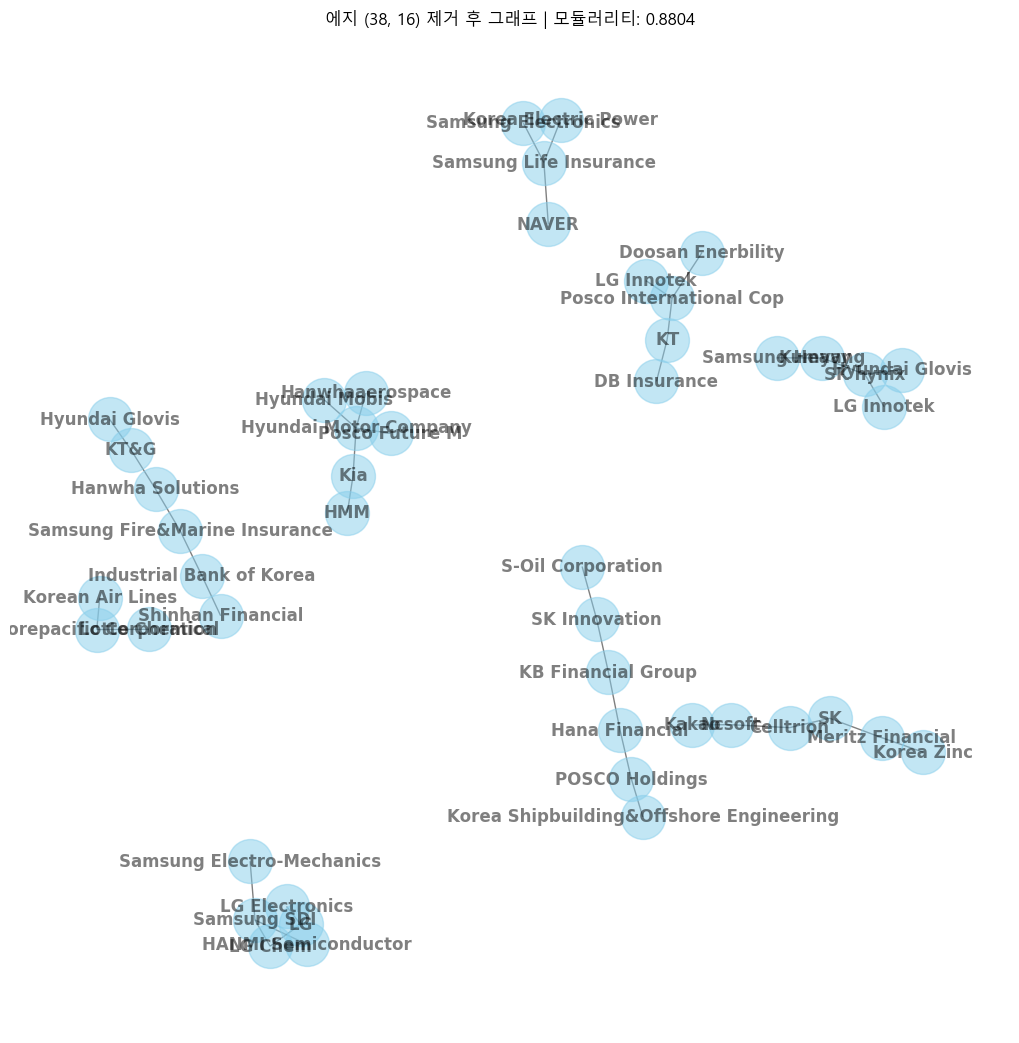

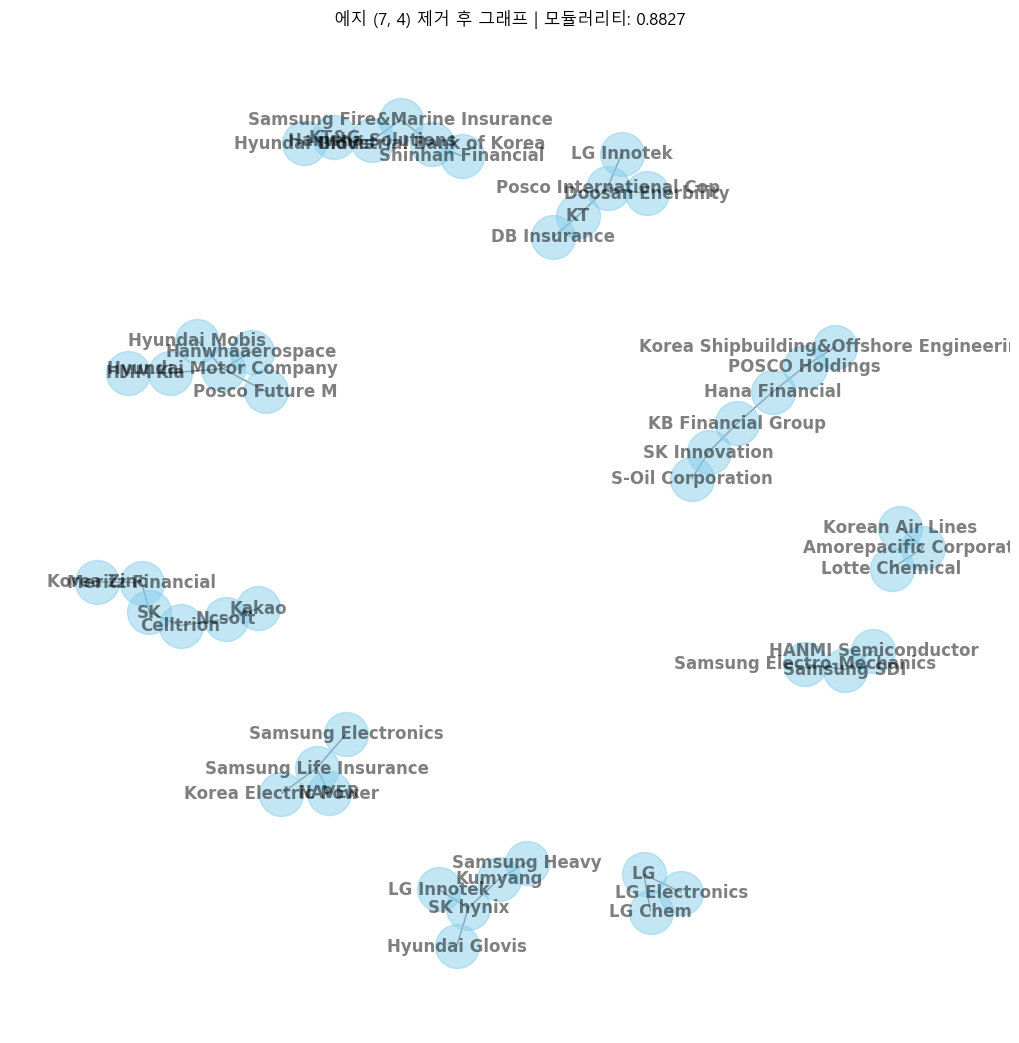

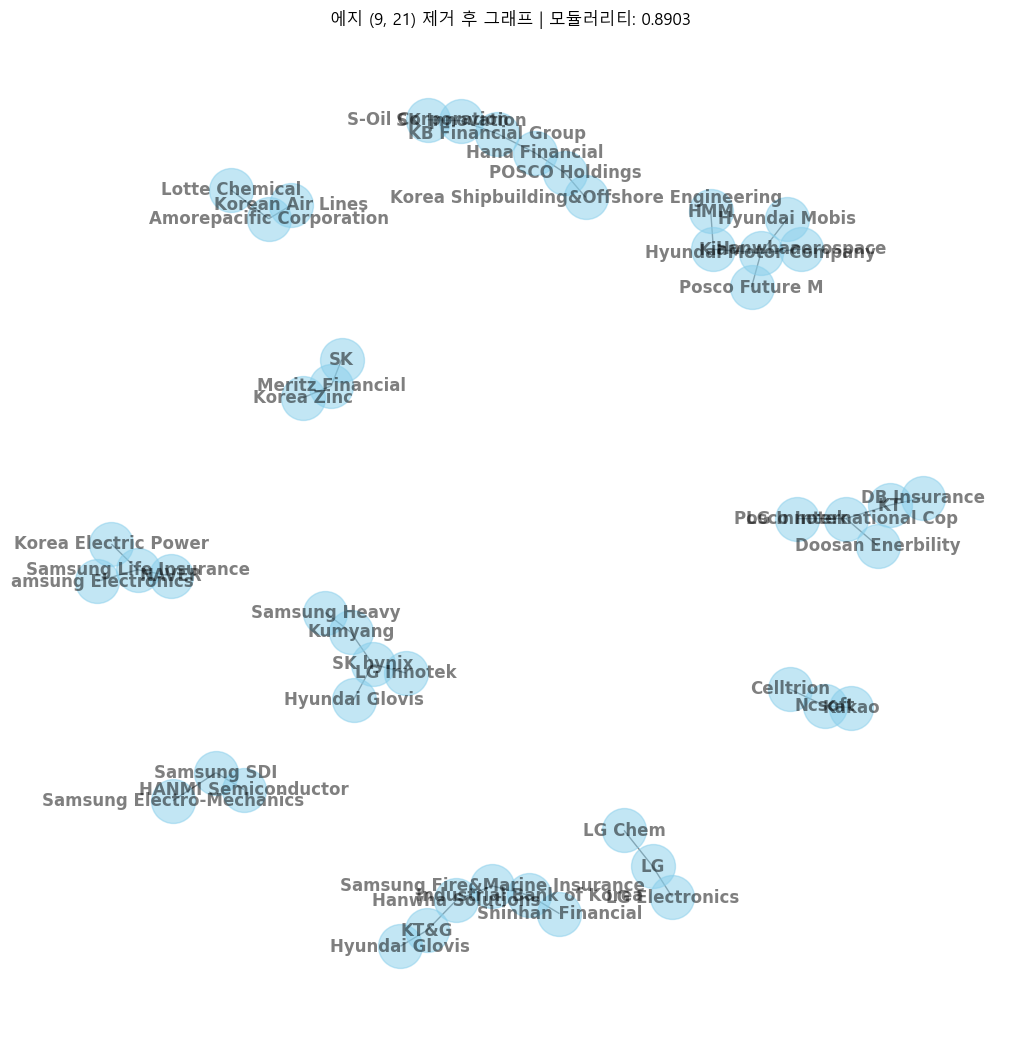

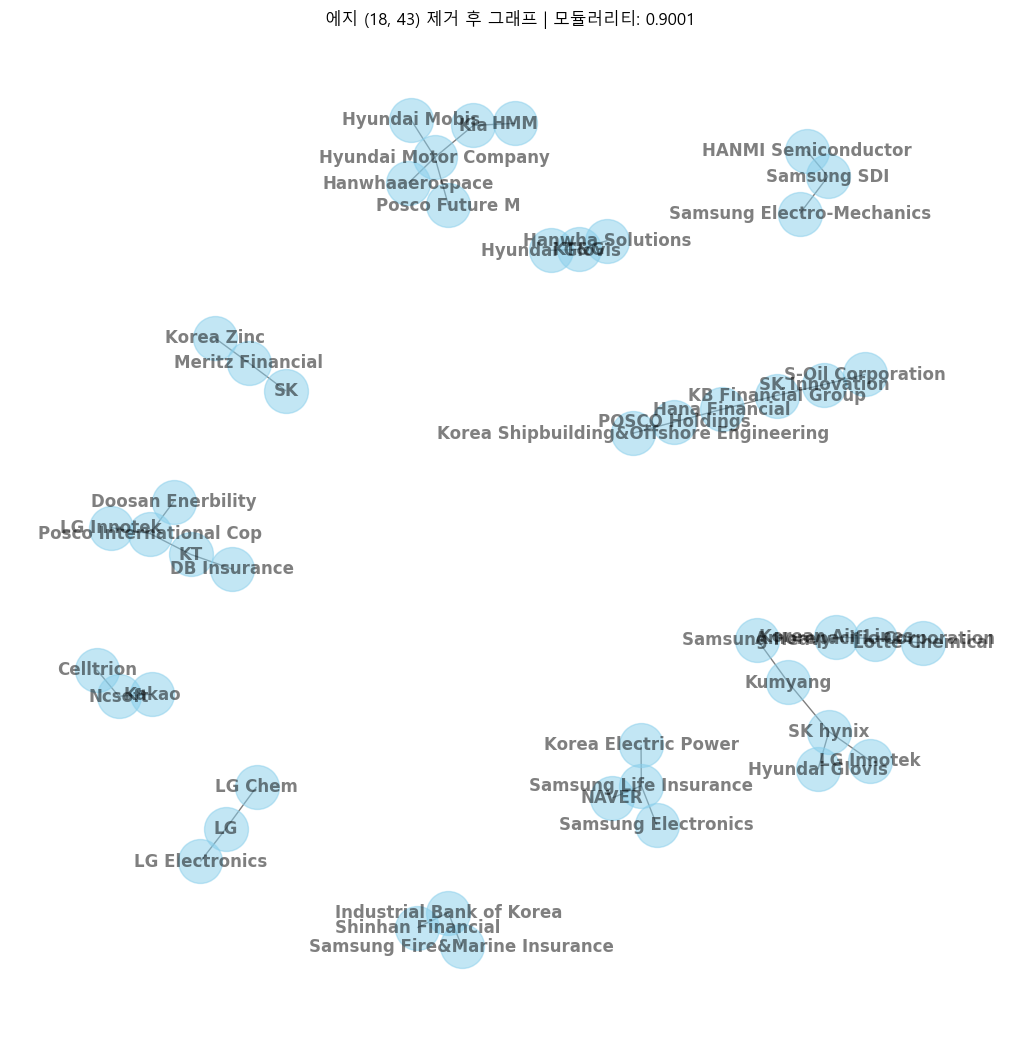

서브그룹 목록:
서브그룹 1: ['Samsung Electro-Mechanics', 'HANMI Semiconductor', 'Samsung SDI']
서브그룹 2: ['DB Insurance', 'LG Innotek', 'Doosan Enerbility', 'Posco International Cop', 'KT']
서브그룹 3: ['SK hynix', 'Kumyang', 'LG Innotek', 'Samsung Heavy', 'Hyundai Glovis']
서브그룹 4: ['Korean Air Lines', 'Amorepacific Corporation', 'Lotte Chemical']
서브그룹 5: ['LG', 'LG Chem', 'LG Electronics']
서브그룹 6: ['Ncsoft', 'Celltrion', 'Kakao']
서브그룹 7: ['Samsung Fire&Marine Insurance', 'Shinhan Financial', 'Industrial Bank of Korea']
서브그룹 8: ['Samsung Life Insurance', 'Samsung Electronics', 'Korea Electric Power', 'NAVER']
서브그룹 9: ['POSCO Holdings', 'S-Oil Corporation', 'Korea Shipbuilding&Offshore Engineering', 'KB Financial Group', 'SK Innovation', 'Hana Financial']
서브그룹 10: ['Hyundai Motor Company', 'Kia', 'Hanwhaaerospace', 'Posco Future M', 'Hyundai Mobis', 'HMM']
서브그룹 11: ['Korea Zinc', 'SK', 'Meritz Financial']
서브그룹 12: ['Hanwha Solutions', 'KT&G', 'Hyundai Glovis']


In [46]:
import networkx as nx
import matplotlib.pyplot as plt
# 기업명을 저장하는 labels 딕셔너리
labels = {i: name for i, name in enumerate(english_company_names)}

# 그래프 생성
G = nx.Graph()
G.add_weighted_edges_from([(i, j, w) for i, j, w in mst_result])

# 네트워크 그래프에 기업의 영어 이름 속성 추가
nx.set_node_attributes(G, labels, 'company_name')

# Girvan-Newman 알고리즘을 사용하여 서브그룹 생성
def girvan_newman_subgroups(graph):
    while nx.number_of_edges(graph) > 0:
        # betweenness centrality 계산
        edge_betweenness = nx.edge_betweenness_centrality(graph)
        
        # 가장 높은 betweenness centrality를 가진 edge 제거
        max_betweenness_edge = max(edge_betweenness, key=edge_betweenness.get)
        graph.remove_edge(*max_betweenness_edge)
        
        # 그래프를 기반으로 서브그룹 찾기
        subgroups = list(nx.connected_components(graph))
        
        # Modularity 계산
        modularity = nx.community.modularity(graph, subgroups)
        
        # 시각화 (선택 사항)
        pos = nx.spring_layout(graph)
        plt.figure(figsize=(10, 10))
        nx.draw(graph, pos, with_labels=True, labels=nx.get_node_attributes(graph, 'company_name'), font_size=12, node_color='skyblue', node_size=1000, font_color='black', font_weight='bold', font_family='sans-serif', alpha=0.5)
        plt.title(f'에지 {max_betweenness_edge} 제거 후 그래프 | 모듈러리티: {modularity:.4f}')
        plt.show()

        # Modularity가 충분히 높으면 중단
        if modularity >= 0.9:  # 필요에 따라 임계값을 조정할 수 있습니다.
            break

    return subgroups

# 'G'가 최소 비용 신장 트리에서 생성한 그래프라고 가정합니다.
subgroups = girvan_newman_subgroups(G)

# 결과 출력
print("서브그룹 목록:")
for i, subgroup in enumerate(subgroups, 1):
    # 서브그룹의 노드를 기업의 영어 이름으로 표시
    subgroup_names = [G.nodes[node]['company_name'] for node in subgroup]
    print(f"서브그룹 {i}: {subgroup_names}")

실루엣 스코어로 최적 군집수 결정

Optimal Number of Clusters: 23


c:\Users\elev0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\elev0\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\cluster\hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
c:\Users\elev0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\elev0\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\cluster\hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously lik

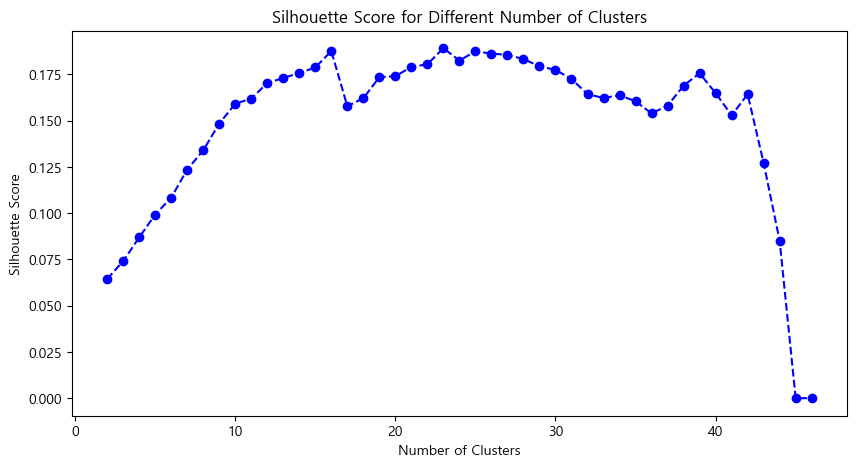

In [47]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# 주어진 최소 비용 신장 트리 결과를 이용하여 노드 수 계산
num_nodes = len(set(v for edge in mst_result for v in edge[:2]))

# 거리 행렬 초기화
distance_matrix = np.zeros((num_nodes, num_nodes))

# 최소 비용 신장 트리 결과를 이용하여 거리 행렬 생성
for i, j, w in mst_result:
    # i, j가 num_nodes 이상이면 무시
    if i < num_nodes and j < num_nodes:
        distance_matrix[i, j] = w
        distance_matrix[j, i] = w

# 최적 군집 개수 결정을 위한 실루엣 스코어 계산
def get_silhouette_score(num_clusters, affinity_matrix):
    # 최적 군집 개수로 hierarchical clustering 수행
    model = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward', affinity='euclidean')
    labels = model.fit_predict(affinity_matrix)
    silhouette_avg = silhouette_score(affinity_matrix, labels)
    return silhouette_avg

# 다양한 군집 개수에 대한 실루엣 스코어 계산
num_clusters_range = range(2, num_nodes)
silhouette_scores = []

for num_clusters in num_clusters_range:
    silhouette_score_val = get_silhouette_score(num_clusters, distance_matrix)
    silhouette_scores.append(silhouette_score_val)

# 최적 군집 개수 찾기
optimal_num_clusters = num_clusters_range[np.argmax(silhouette_scores)]

# 최적 군집 개수로 hierarchical clustering 수행
model = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward', affinity='euclidean')

labels = model.fit_predict(distance_matrix)

# 결과 출력
print(f"Optimal Number of Clusters: {optimal_num_clusters}")

# 시각화: 군집 개수에 따른 실루엣 스코어 변화
plt.figure(figsize=(10, 5))
plt.plot(num_clusters_range, silhouette_scores, marker='o', linestyle='--', color='b')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()



C:\Users\elev0\AppData\Local\Temp\ipykernel_9952\1660715396.py:34: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='ward')


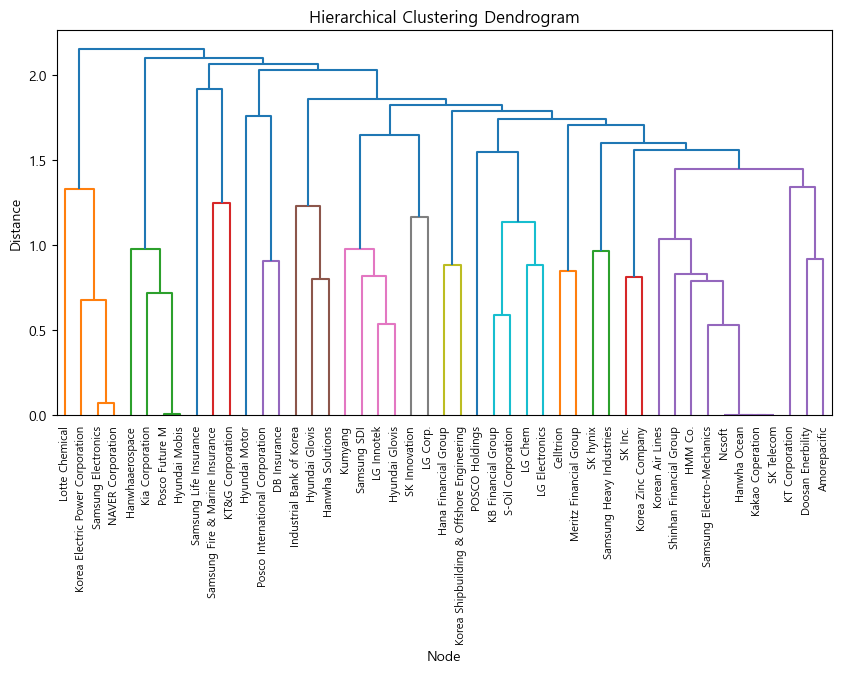

In [48]:
# 주어진 최소 비용 신장 트리 결과를 이용하여 노드 수 계산
num_nodes = len(set(v for edge in mst_result for v in edge[:2]))

# 기업명을 덴드로그램에 표시할 리스트 생성 (일부만 선택)
selected_company_names_for_dendrogram = [
    "Samsung Electronics", "SK hynix", "POSCO Holdings", 
    "Hyundai Motor", "LG Chem", "Kia Corporation", 
    "NAVER Corporation", "Samsung SDI", "Posco Future M", 
    "Celltrion", "Kakao Coperation", "Hyundai Mobis",
    "KB Financial Group", "Shinhan Financial Group", 
    "LG Electronics", "SK Innovation", 
    "Samsung Life Insurance", "LG Corp.", 
    "Samsung Fire & Marine Insurance", "Hana Financial Group", 
    "Korea Electric Power Corporation", "SK Inc.", "KT&G Corporation", 
    "Meritz Financial Group", "SK Telecom", 
    "Samsung Electro-Mechanics", "HMM Co.", 
    "Korea Zinc Company", "Doosan Enerbility", 
    "Posco International Corporation", "Industrial Bank of Korea", 
    "KT Corporation", "Hanwha Ocean", 
    "Korean Air Lines", "Korea Shipbuilding & Offshore Engineering", 
    "S-Oil Corporation", "Amorepacific", 
    "Kumyang", "Lotte Chemical", "Hyundai Glovis", 
    "Hanwhaaerospace", "DB Insurance", "Ncsoft", 
    "Hanwha Solutions", "LG Innotek",  
    "Samsung Heavy Industries", "Hyundai Glovis", "HANMI Semiconductor",
    "Ncsoft", "LG Innotek", "Cosmo Advanced Materials & Technology", 
    "LG Household & Health Care", "Samsung Engineering"
]

# 일부 기업명만 선택
selected_company_names_for_dendrogram = selected_company_names_for_dendrogram[:num_nodes]

# 시각화: 최적 군집 개수로 hierarchical clustering 덴드로그램 그리기
linkage_matrix = linkage(distance_matrix, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=selected_company_names_for_dendrogram, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Node')
plt.ylabel('Distance')
plt.show()



In [49]:
import pandas as pd

# 군집 결과를 DataFrame으로 변환
cluster_df = pd.DataFrame({'Company': selected_company_names_for_dendrogram, 'Cluster': labels})

# 각 군집에 속하는 기업들을 출력
cluster_tables = {}
for cluster_num in range(optimal_num_clusters):
    cluster_members = cluster_df[cluster_df['Cluster'] == cluster_num]['Company'].tolist()
    cluster_tables[f'Cluster {cluster_num + 1} Members'] = cluster_members

# 결과를 표로 출력
pd.DataFrame.from_dict(cluster_tables, orient='index').transpose()


,Cluster 1 Members,Cluster 2 Members,Cluster 3 Members,Cluster 4 Members,Cluster 5 Members,Cluster 6 Members,Cluster 7 Members,Cluster 8 Members,Cluster 9 Members,Cluster 10 Members,...,Cluster 14 Members,Cluster 15 Members,Cluster 16 Members,Cluster 17 Members,Cluster 18 Members,Cluster 19 Members,Cluster 20 Members,Cluster 21 Members,Cluster 22 Members,Cluster 23 Members
0,Kakao Coperation,Samsung Heavy Industries,Hyundai Glovis,DB Insurance,LG Innotek,Hanwhaaerospace,Hanwha Solutions,SK Inc.,Hyundai Glovis,Industrial Bank of Korea,...,Posco International Corporation,S-Oil Corporation,Shinhan Financial Group,LG Corp.,Lotte Chemical,Korea Electric Power Corporation,KB Financial Group,Samsung Electro-Mechanics,Amorepacific,Hanwha Ocean
1,SK Telecom,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


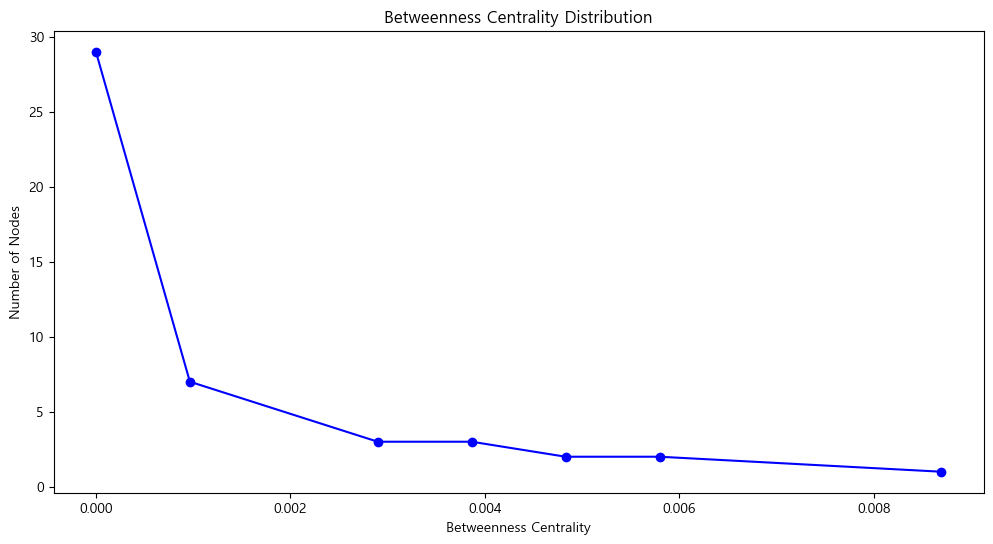

In [50]:
# Calculate Betweenness Centrality
btwnCent = nx.betweenness_centrality(G, normalized=True, endpoints=False)

# Count the number of nodes with each Betweenness Centrality value
btwn_counts = {centrality: list(btwnCent.values()).count(centrality) for centrality in set(btwnCent.values())}

# Sort the data for plotting
sorted_data = sorted(btwn_counts.items(), key=lambda x: x[0])

# Extract x and y values for the plot
x_values, y_values = zip(*sorted_data)

# Plot Betweenness Centrality distribution
plt.figure(figsize=(12, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')
plt.title('Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Number of Nodes')
plt.show()

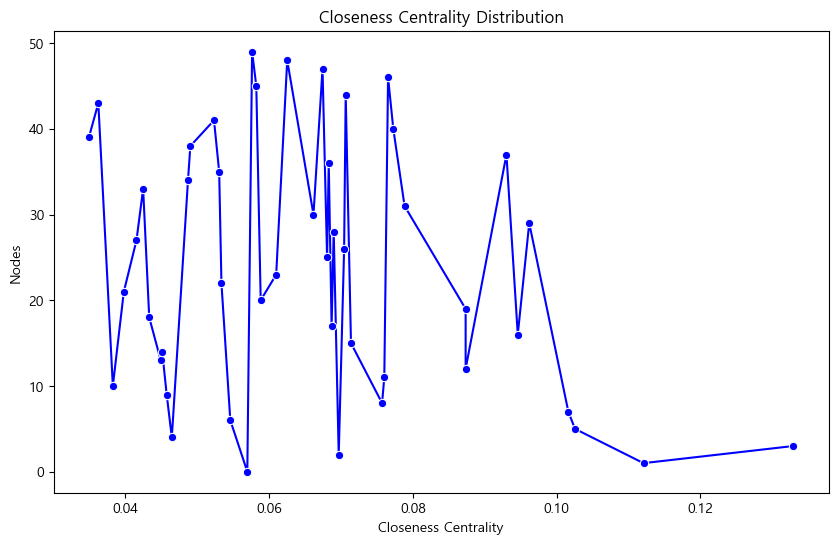

In [51]:
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already created the graph G and calculated distances
closeness_centrality = nx.closeness_centrality(G, distance='weight')

plt.figure(figsize=(10, 6))
sns.lineplot(x=list(closeness_centrality.values()), y=list(closeness_centrality.keys()), marker='o', color='blue')
plt.title('Closeness Centrality Distribution')
plt.xlabel('Closeness Centrality')
plt.ylabel('Nodes')
plt.show()


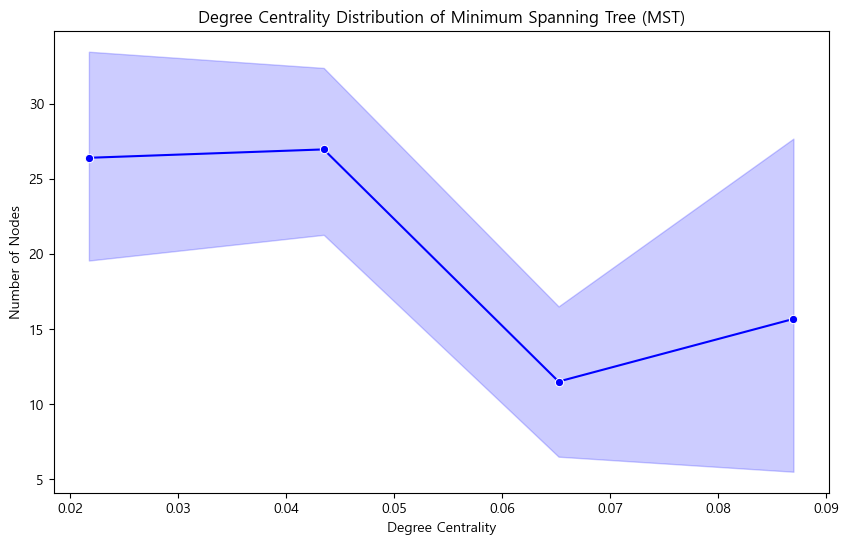

In [52]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# ... (previous code)

# Create a graph using the Minimum Spanning Tree result
G = nx.Graph()
G.add_weighted_edges_from([(i, j, w) for i, j, w in mst_result])

# Calculate Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Plot Degree Centrality Distribution
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(degree_centrality.values()), y=list(degree_centrality.keys()), marker='o', color='blue')
plt.xlabel('Degree Centrality')
plt.ylabel('Number of Nodes')
plt.title('Degree Centrality Distribution of Minimum Spanning Tree (MST)')
plt.show()

cutree